In [17]:
import time
import numpy as np

from brainflow.board_shim import BoardShim, BrainFlowInputParams, LogLevels, BoardIds
from brainflow.data_filter import DataFilter, AggOperations

from sklearn import tree

In [ ]:
board_id = BoardIds.CROWN_BOARD.value
params = BrainFlowInputParams()
params.mac_address = "C0:EE:40:84:DD:56"
params.serial_number = "58a99b0107e64cd40ea5e6607882cbe2"
params.board_id = board_id
BoardShim.enable_dev_board_logger()
board = BoardShim(board_id, params)
board.prepare_session()
board.start_stream()
time.sleep(1)

In [ ]:
data = board.get_board_data()

In [ ]:
board.stop_stream()
board.release_session()

In [26]:
model = tree.DecisionTreeClassifier()
model = model.fit(inputs, outputs)

In [28]:
print(model.predict([[2, 2]]))
print(model.predict_proba([[0, 1]]))

[1.]


[Text(0.5, 0.75, 'X[0] <= 0.5\nsquared_error = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0')]

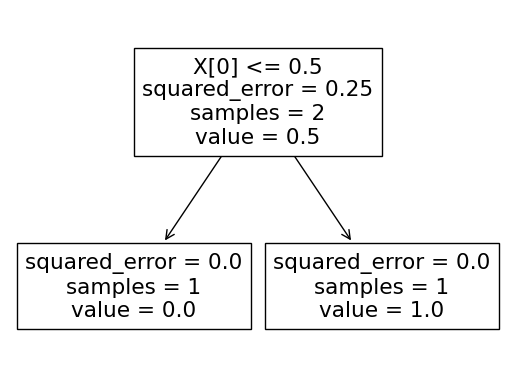

In [29]:
tree.plot_tree(model)